## Import Libraries 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import r2_score  

## Loading Dataset

In [3]:
df = pd.read_csv('Housing.csv')  
df.head()    

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Data understanding


In [4]:
df.shape

(545, 13)

In [5]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [6]:
df.describe

<bound method NDFrame.describe of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       

In [7]:

df.describe(include ='all')


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


### Checking for Null Values

In [8]:
df.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Checking Outliers 

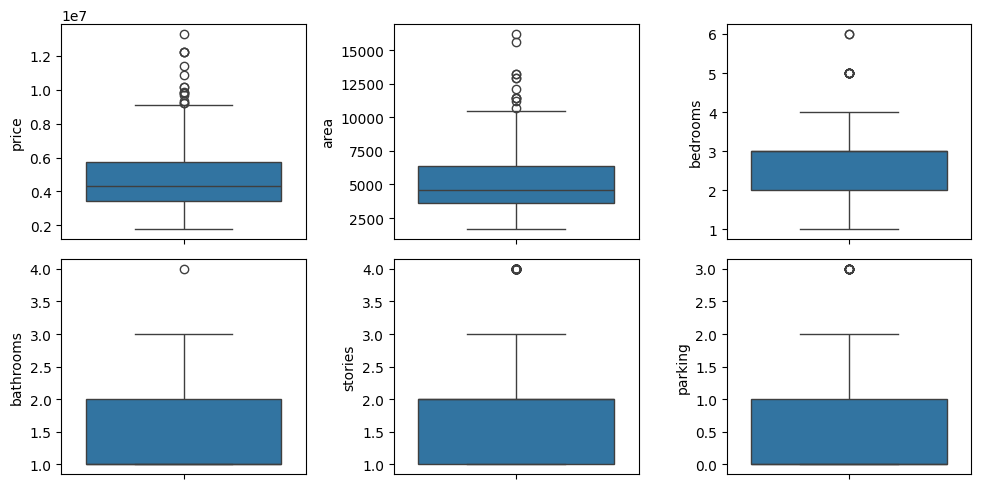

In [9]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

### Removing outliers 

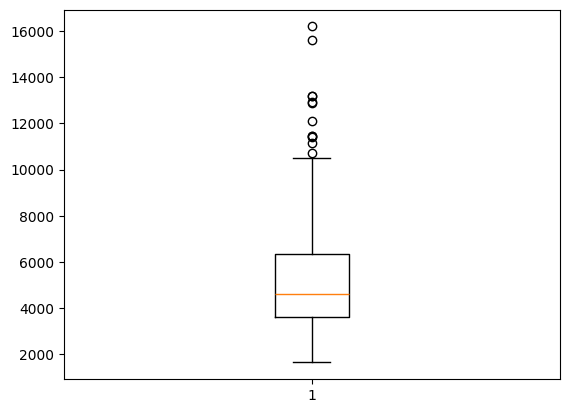

In [10]:

plt.boxplot(df.area)
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]



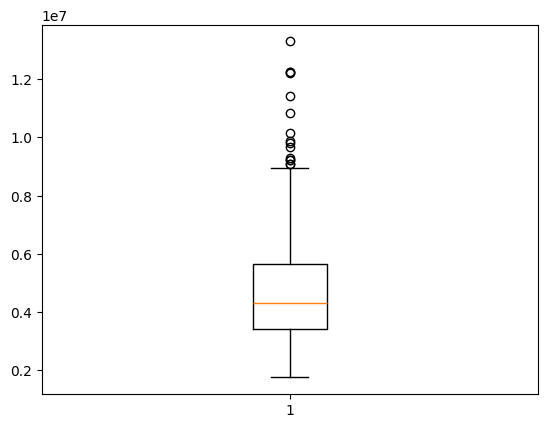

In [11]:
plt.boxplot(df.price)
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]



### EDA 

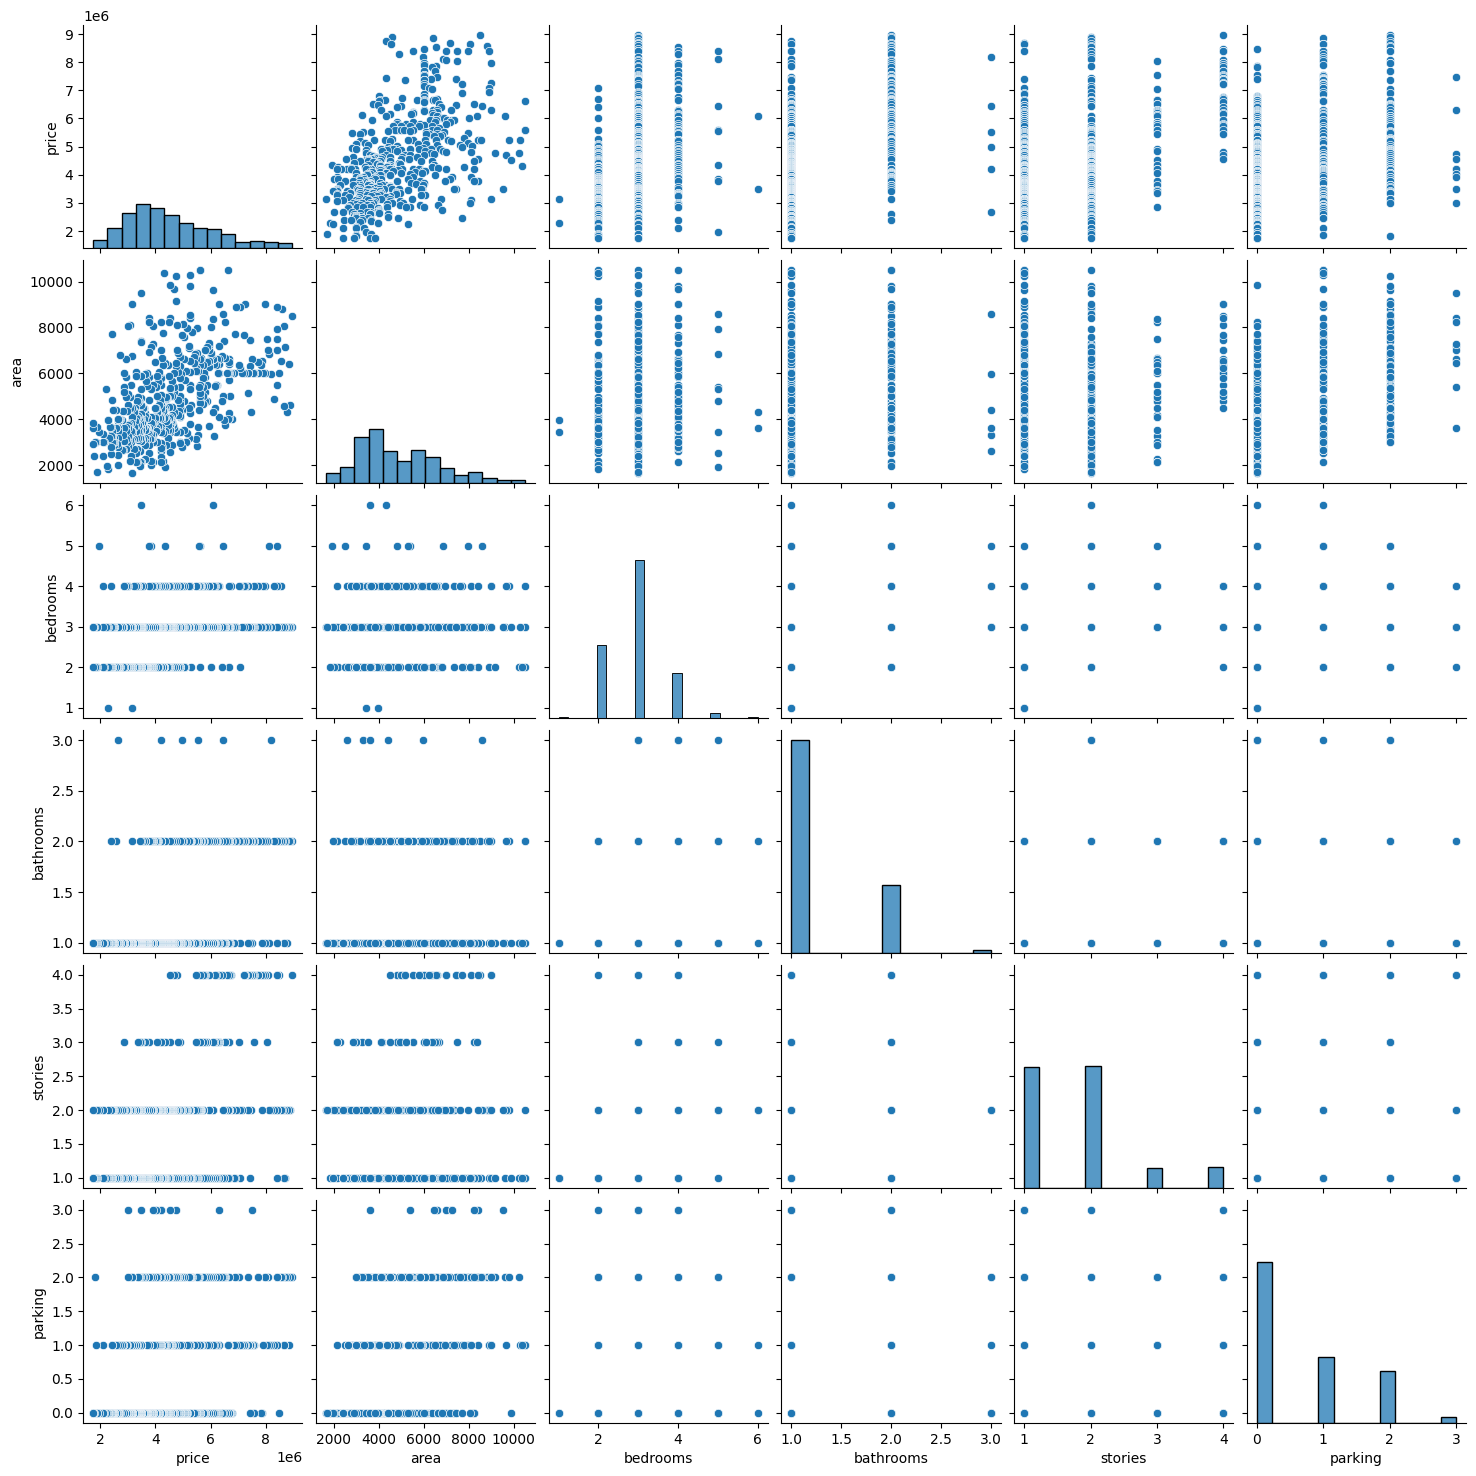

In [12]:
sns.pairplot(df)
plt.show()

In [13]:
# Binary Categorical Variable
categorical_col =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[categorical_col]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
17,yes,no,no,no,yes,no
18,yes,yes,no,no,yes,no
19,yes,no,no,no,yes,yes
20,yes,no,yes,yes,no,no
21,yes,yes,yes,no,yes,no
...,...,...,...,...,...,...
540,yes,no,yes,no,no,no
541,no,no,no,no,no,no
542,yes,no,no,no,no,no
543,no,no,no,no,no,no


In [14]:
def binary_map(x):
    """
    Function to map 'yes' and 'no' values to 1 and 0, respectively.
    
    Parameters:
    x (pandas Series): Input Series containing 'yes' and 'no' values.
    
    Returns:
    pandas Series: Mapped Series with 'yes' mapped to 1 and 'no' mapped to 0.
    """
    return x.map({'yes': 1, 'no': 0})

In [15]:
df[categorical_col] = df[categorical_col].apply(binary_map)


df[categorical_col]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
17,1,0,0,0,1,0
18,1,1,0,0,1,0
19,1,0,0,0,1,1
20,1,0,1,1,0,0
21,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [16]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,semi-furnished
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,unfurnished


In [17]:
## Handling categorical data with dummy variables 
dummy_col = pd.get_dummies(df['furnishingstatus'])


dummy_col.head()

,furnished,semi-furnished,unfurnished
17,True,False,False
18,True,False,False
19,False,True,False
20,False,True,False
21,False,False,True


In [18]:
dummy_col = pd.get_dummies(df['furnishingstatus'], drop_first=True)


dummy_col.head()

,semi-furnished,unfurnished
17,False,False
18,False,False
19,True,False
20,True,False
21,False,True


In [19]:
df = pd.concat([df, dummy_col], axis=1)


df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,False,False
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,False,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,True,False
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,semi-furnished,True,False
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,unfurnished,False,True


In [20]:
## Changing categorical to binary Method 2 
df['unfurnished'] = df['unfurnished'].replace({True: 1, False: 0})
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,False,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,False,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,True,0
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,semi-furnished,True,0
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,unfurnished,False,1


In [21]:
df['semi-furnished'] = df['semi-furnished'].replace({True: 1, False: 0})
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,1,0
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,semi-furnished,1,0
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,unfurnished,0,1


In [22]:
# from sklearn.preprocessing import OneHotEncoder

# # Assuming more categories
# data = {'furnishingstatus': ['furnished', 'unfurnished', 'semi-furnished']}

# # Create a new column for each category
# encoder = OneHotEncoder()
# encoded_data = encoder.fit_transform(df[['furnishingstatus']]).toarray()

# # Add the encoded columns to the DataFrame
# new_columns = [f'furnishingstatus_{category}' for category in encoder.categories_[0]]
# df = pd.concat([df, pd.DataFrame(encoded_data, columns=new_columns)], axis=1)

In [23]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,1,0
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,semi-furnished,1,0
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,unfurnished,0,1


In [24]:
df.drop(['furnishingstatus'], axis = 1, inplace = True)

### Splitting data 

In [25]:
np.random.seed(0)


df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

from sklearn.model_selection import train_test_split



In [26]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
251,4515000,3450,3,1,2,1,0,1,0,0,1,0,1,0
147,5600000,5500,3,2,2,1,0,0,0,0,1,0,1,0
214,4865000,4350,2,1,1,1,0,1,0,0,0,0,0,1
356,3773000,2520,5,2,1,0,0,1,0,1,1,0,0,0
475,2961000,3000,2,1,2,1,0,0,0,0,0,0,1,0


In [27]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [28]:
df_train.shape

(362, 14)

In [29]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
365,3703000,5450,2,1,1,1,0,0,0,0,0,0,0,0
262,4445000,3750,2,1,1,1,1,1,0,0,0,0,1,0
385,3570000,3640,2,1,1,1,0,0,0,0,0,0,0,1
176,5250000,8520,3,1,1,1,0,0,0,1,2,0,0,0
273,4340000,3500,4,1,2,1,0,0,0,0,2,0,0,0


In [30]:
df_test.shape

(156, 14)

### Scaling Using MinMAX Scaler
#### House price data often involves features with different units and magnitudes (e.g., square footage, number of bedrooms, and price). Min-Max scaling ensures that all features are on a comparable scale, preventing features with larger magnitudes from dominating the learning process.In linear regression, scaled coefficients can be interpreted more easily. A scaled coefficient indicates the change in the target variable (house price) for a unit change in the scaled feature, making it easier to understand the feature's importance.

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()


In [33]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [34]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
251,0.383495,0.203390,0.4,0.0,0.333333,1,0,1,0,0,0.333333,0,1,0
147,0.533981,0.435028,0.4,0.5,0.333333,1,0,0,0,0,0.333333,0,1,0
214,0.432039,0.305085,0.2,0.0,0.000000,1,0,1,0,0,0.000000,0,0,1
356,0.280583,0.098305,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0,0,0
475,0.167961,0.152542,0.2,0.0,0.333333,1,0,0,0,0,0.000000,0,1,0


In [35]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000
mean,0.386688,0.360925,0.388950,0.135359,0.267035,0.842541,0.176796,0.359116,0.027624,0.303867,0.221915,0.209945,0.439227,0.320442
std,0.213195,0.203829,0.150675,0.240426,0.282712,0.364737,0.382024,0.480405,0.164121,0.460563,0.289636,0.407833,0.496980,0.467292
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.229369,0.207345,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.342233,0.322034,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.524272,0.491525,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking Correlation 
The correlation between two variables can be checked using the correlation coefficient. The correlation coefficient is a measure of
the strength and direction of the linear relationship between two variables on a scatterplot. The value of the

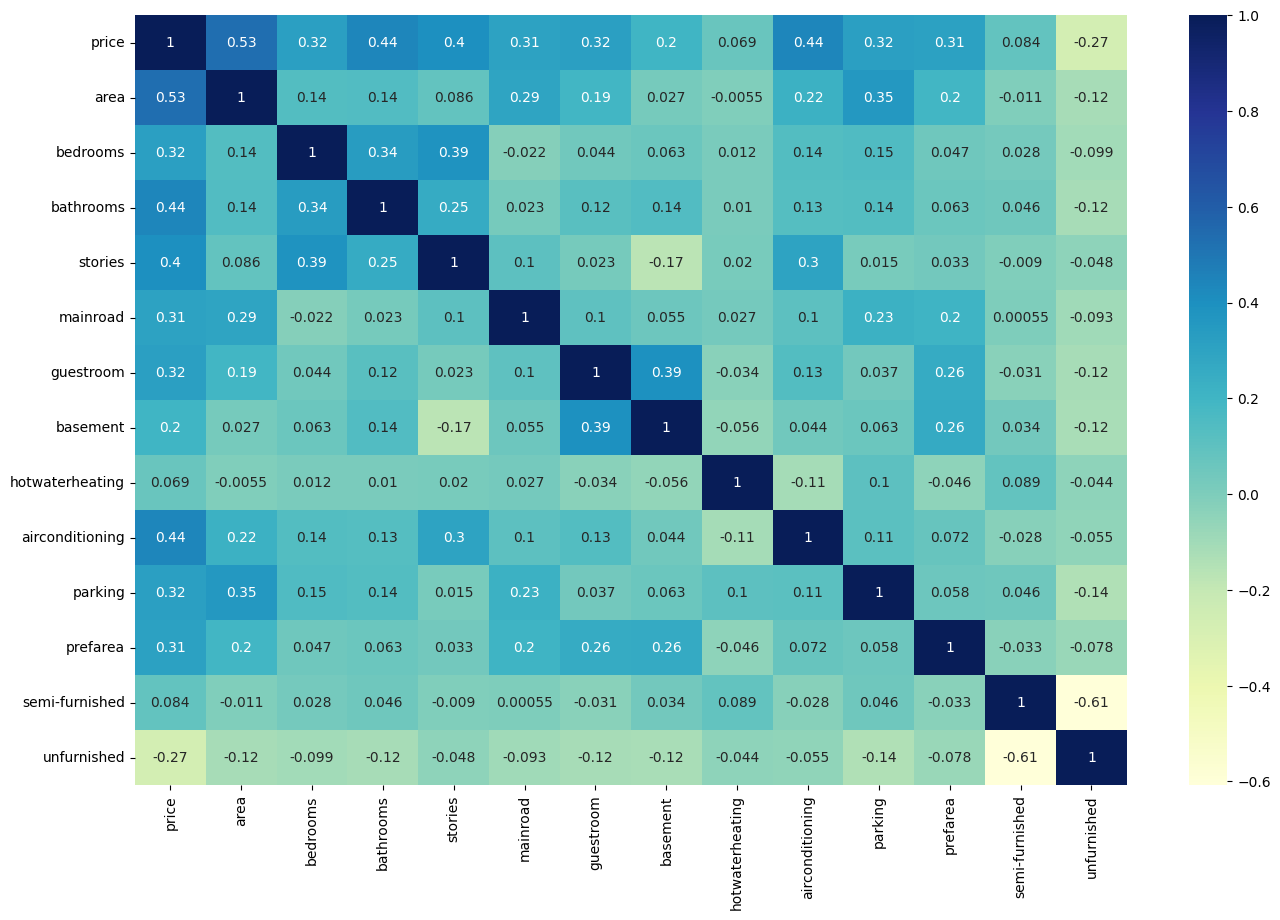

In [36]:
# Let's check the correlation coefficients to see which variables are highly correlated first drop the column that is string 
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 518 entries, 17 to 544
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            518 non-null    int64
 1   area             518 non-null    int64
 2   bedrooms         518 non-null    int64
 3   bathrooms        518 non-null    int64
 4   stories          518 non-null    int64
 5   mainroad         518 non-null    int64
 6   guestroom        518 non-null    int64
 7   basement         518 non-null    int64
 8   hotwaterheating  518 non-null    int64
 9   airconditioning  518 non-null    int64
 10  parking          518 non-null    int64
 11  prefarea         518 non-null    int64
 12  semi-furnished   518 non-null    int64
 13  unfurnished      518 non-null    int64
dtypes: int64(14)
memory usage: 60.7 KB


## Insights:

### The most significant factors influencing house prices seem to be area, number of rooms, and location-specific features.Furnishing status can have a notable impact on price, with unfurnished houses being potentially less expensive.Understanding these correlations can be valuable for building predictive models and making informed decisions about real estate investments.

In [38]:
y_train = df_train.pop('price')
X_train = df_train

### Model Implementation

In [39]:
# Importing RFE and LinearRegression

from sklearn.linear_model import LinearRegression

In [40]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [41]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,1,0
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,0,1


In [42]:
from sklearn.feature_selection import RFE

# Assuming you have already defined lm (estimator) and X_train, y_train (data)

# Create the RFE object with only the required arguments
rfe = RFE(lm, n_features_to_select=6)

# Fit the RFE object to the data
rfe = rfe.fit(X_train, y_train)

### Recursive Feature Elimination (RFE) is a feature selection technique in scikit-learn (sklearn) that aims to identify the most relevant features in a dataset for a given machine learning model.

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 5),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 6),
 ('guestroom', False, 3),
 ('basement', False, 7),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', False, 2),
 ('prefarea', True, 1),
 ('semi-furnished', False, 8),
 ('unfurnished', False, 4)]

### The RFE output indicates that the following features are considered the most important for the model:
* area 
* bathrooms 
* stories 
* hotwaterheating 
* airconditioning 
* prefarea
### These features were selected over others, such as bedrooms, mainroad, guestroom, basement, parking, semi-furnished, and unfurnished. This suggests that these features have a stronger correlation or predictive power for the target variable in the model.``` 

In [44]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'hotwaterheating', 'airconditioning',
       'prefarea'],
      dtype='object')

In [45]:
X_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'parking',
       'semi-furnished', 'unfurnished'],
      dtype='object')

### Building model using statsmodel, for detailed statistics

In [46]:
X_train_rfe = X_train[col]

In [47]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [48]:
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [49]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     86.27
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           2.65e-66
Time:                        17:53:31   Log-Likelihood:                 209.12
No. Observations:                 362   AIC:                            -404.2
Df Residuals:                     355   BIC:                            -377.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1049      0.016     

### Calculating VIFs: it quantifies how much the variance of a particular regression coefficient is increased due to the presence of other correlated predictors in the model.

### High VIF values indicate multicollinearity:

* VIF = 1: No multicollinearity.
* VIF > 1: Some degree of multicollinearity.
* VIF > 5 or 10: Strong multicollinearity.


In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.85
5,airconditioning,1.17
3,stories,1.16
1,area,1.10
2,bathrooms,1.09
6,prefarea,1.04
4,hotwaterheating,1.02


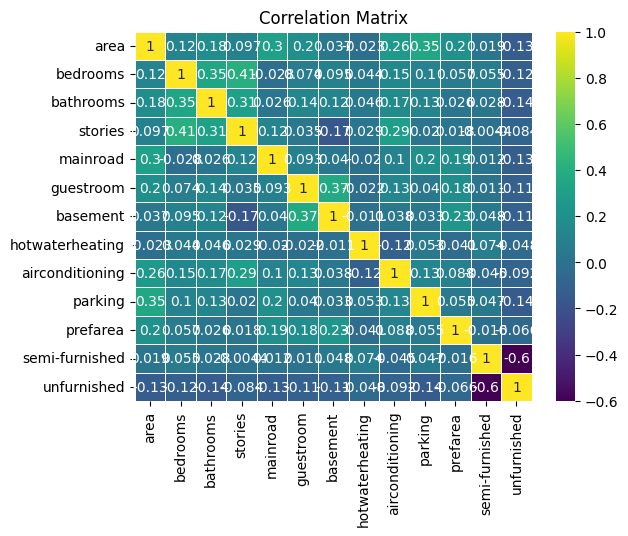

In [52]:
### For better cooreelaion visuals 
correlation_matrix = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement','hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'semi-furnished', 'unfurnished']].corr()

# Create a heatmap to visualize the correlations
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [53]:
y_train_price = lm.predict(X_train_rfe)

In [54]:
res = (y_train_price - y_train)

C:\Users\Netkom\AppData\Local\Temp\ipykernel_9656\1438746396.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_price), bins = 20)


Text(0.5, 0, 'Errors')

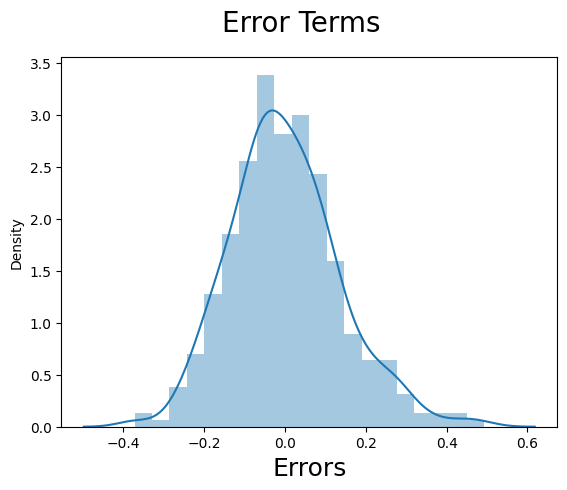

In [55]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

### Overall, the error terms exhibit a relatively well-behaved distribution, which is a good sign for the model's performance.

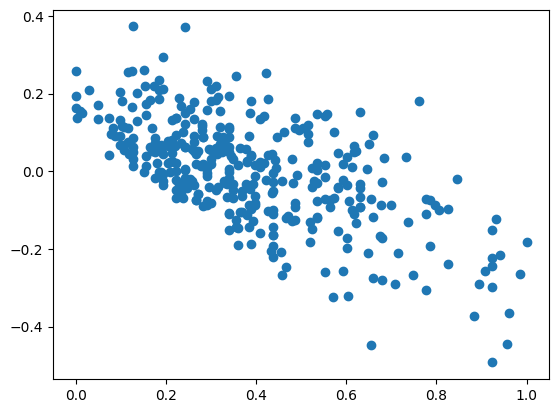

In [56]:
plt.scatter(y_train,res)
plt.show()

## Model Evaluation


In [57]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']

In [58]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [59]:
y_test = df_test.pop('price')
X_test = df_test

In [60]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)


In [61]:
X_test_rfe = X_test[X_train_rfe.columns]

In [62]:
# Making predictions
y_pred = lm.predict(X_test_rfe)

In [66]:
from sklearn.metrics import r2_score 
r2=r2_score(y_test, y_pred)
print(r2)

0.5878935256972205


Text(0, 0.5, 'y_pred')

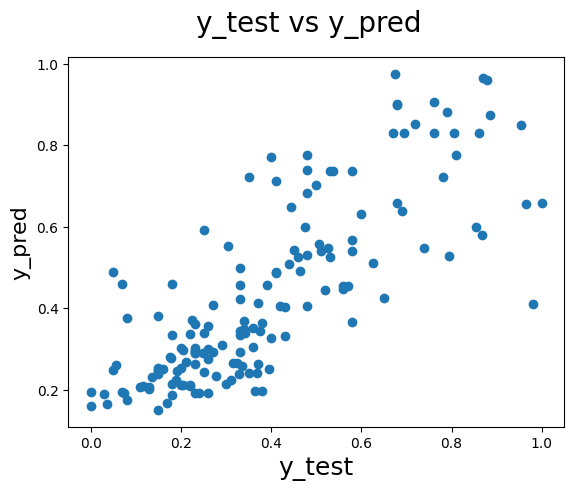

In [64]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                             # Y-Label

In [74]:
# Prepare   

new_data = pd.DataFrame({
    "area": [6840],
    "bedrooms": [5],
    "bathrooms": [1],
    "stories": [2],
    "mainroad": [1],
    "guestroom": [1],
    "basement": [0],
    "hotwaterheating": [0],
    "airconditioning": [1],
    "parking": [1],
    "prefarea": [0],
    "semi-furnished": [0],
    "unfurnished": [0]
})

# Make predictions
predicted_price = rfe.predict(new_data)

print("Predicted price:", predicted_price)

Predicted price: [2722.30113918]
